# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv 
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [8]:
import numpy as np
import pandas as pd
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, f1_score, precision_score, recall_score)
from wordcloud import WordCloud

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
# Link Dataset Online
dataset_url = "https://drive.google.com/uc?export=download&id=1wj4INHmC0bF1y88nBkFqfIe-bJEZUvaG"

# Path Dataset Local (Sesuai struktur folder tugas)
local_path = os.path.join('..', 'emails_raw', 'emails.csv')

if os.path.exists(local_path):
    print(f"Sedang memuat data dari Local File: {local_path}")
    df = pd.read_csv(local_path)
else:
    print(f"Local file tidak ditemukan. Sedang memuat data dari URL Drive...")
    df = pd.read_csv(dataset_url)

# Tampilkan data
df.head()

Sedang memuat data dari Local File: ..\emails_raw\emails.csv


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

C:\Users\lenov\AppData\Local\Temp\ipykernel_23288\2822737203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Prediction', data=df, palette='viridis')


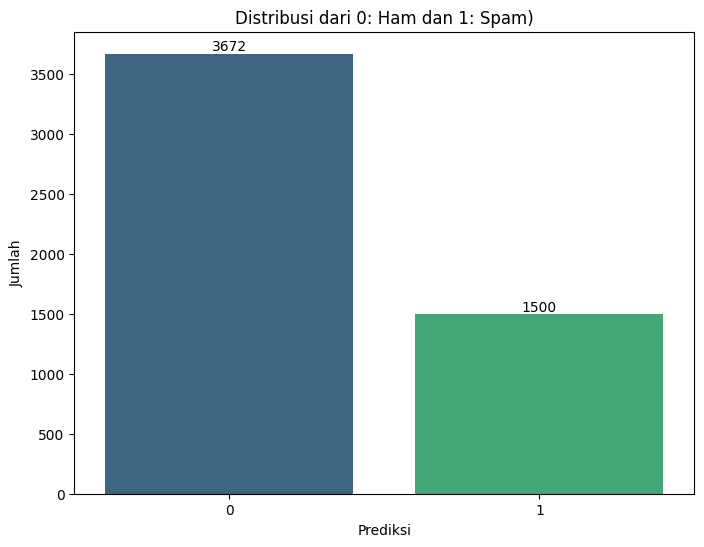

In [10]:
# Cek distribusi kelas
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Prediction', data=df, palette='viridis')
plt.title('Distribusi dari 0: Ham dan 1: Spam)')
plt.xlabel('Prediksi')
plt.ylabel('Jumlah')

# Tambahkan anotasi pada setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

Text(0.5, 1.0, 'Words in Spam Emails (Prediction = 1)')

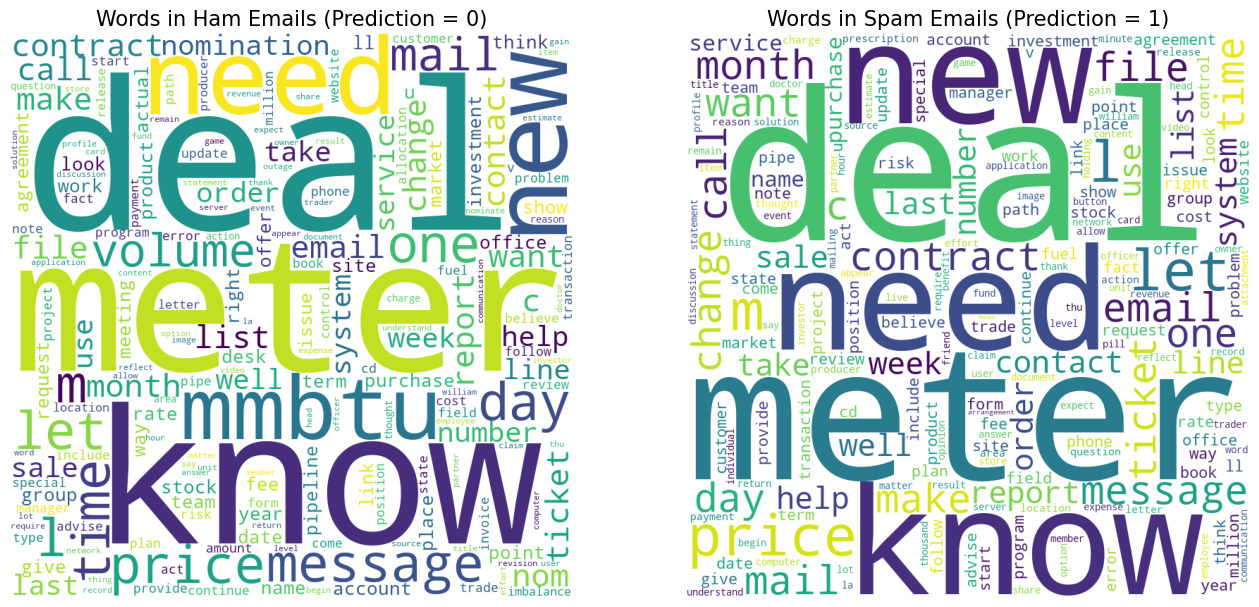

In [11]:
# Cek Wordcloud
ham_emails = df[df['Prediction'] == 0]
spam_emails = df[df['Prediction'] == 1]
feature_columns = [col for col in df.columns if col not in ['Email No.', 'Prediction']]
ham_words = ' '.join(list(ham_emails[feature_columns].columns[ham_emails[feature_columns].sum(axis=0) > 0]))
ham_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(ham_words)

# Generate word cloud for spam emails
spam_words = ' '.join(list(spam_emails[feature_columns].columns[spam_emails[feature_columns].sum(axis=0) > 0]))
spam_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(spam_words)

# Plot the WordClouds
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.title('Words in Ham Emails (Prediction = 0)', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.title('Words in Spam Emails (Prediction = 1)', fontsize=15)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# drop beberapa word yang umum muncul di kedua kelas
word_drop = ['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is',
                     'this', 'have', 'will', 'with', 'your', 'at', 'we', 's', 'are',
                     'it', 'by', 'com', 'as', 'from', 'or', 'not', 'me', 'deal', 'if',
                     'please', 'any', 'our', 'can', 'all', 'has', 'was', 'know', 'need',
                     'an', 'new', 'may', 'up', 'should', 'do', 'get', 'out', 'see', 'no',
                     'there', 'but', 'been', 'company', 'these', 'let', 'so', 'would', 'into',
                     'us', 'information', 'they', 'message', 'day', 'time', 'my', 'one', 'what',
                     'only', 'which', 'more', 'about', 'energy', 'question', 'call', 'mail', 'some',
                     'original', 'email', 'sent', 'just', 'from', 'now', 'like', 'then', 'go', 'also',
                     'report', 'here', 'back', 'good', 'said', 'project', 'make', 'group', 'receive',
                     'start', 'business', 'system', 'request', 'work', 'development', 'management',
                     'today', 'service', 'thanks', 'team', 'meeting', 'be', 'p', 'w', 's', 'b', 'meter','price', 'contract']
df = df.drop(columns=[col for col in word_drop if col in df.columns and col != 'Prediction'], errors='ignore') #abaikan jika kolom tidak ada
print("Tabel setelah penghapusan kata umum:")
print(df.columns)

Tabel setelah penghapusan kata umum:
Index(['Email No.', 'ect', 'hou', 'enron', 'i', 'that', 'gas', 'hpl', 're',
       'e',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=2890)


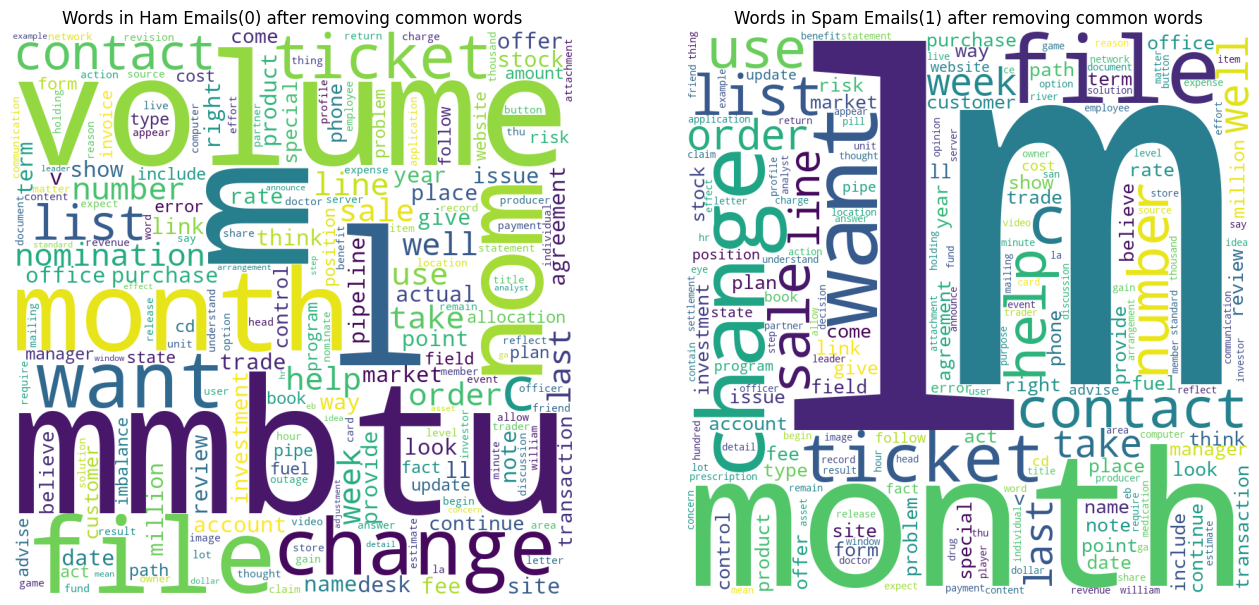

In [13]:
# cek ulang wordcloud setelah penghapusan kata umum
ham_emails = df[df['Prediction'] == 0]
spam_emails = df[df['Prediction'] == 1]
feature_columns = [col for col in df.columns if col not in ['Email No.', 'Prediction']]
# Generate word cloud for ham emails
ham_words = ' '.join(list(ham_emails[feature_columns].columns[ham_emails[feature_columns].sum(axis=0) > 0]))
ham_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(ham_words)
# Generate word cloud for spam emails
spam_words = ' '.join(list(spam_emails[feature_columns].columns[spam_emails[feature_columns].sum(axis=0) > 0]))
spam_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', 
                min_font_size = 10).generate(spam_words)
# Plot the WordClouds
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.title('Words in Ham Emails(0) after removing common words', fontsize=12)
plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.title('Words in Spam Emails(1) after removing common words', fontsize=12)
plt.show()

In [14]:
# data sudah siap dikerjakan untuk modelling, cocok menggunakan TF-IDF atau BOW
# Simpan data yang sudah dipreprocessing
output_folder = 'emails_preprocessing'
output_filename = 'emails_preprocessing.csv'

# Buat folder jika belum ada (agar tidak error)
os.makedirs(output_folder, exist_ok=True)

# Gabungkan path
save_path = os.path.join(output_folder, output_filename)

# Simpan DataFrame ke CSV (tanpa index)
df.to_csv(save_path, index=False)

print(f"✅ Data berhasil disimpan di: {save_path}")


✅ Data berhasil disimpan di: emails_preprocessing\emails_preprocessing.csv
